# SGD Classifier
- LogisticRegression + SGD(확률적경사하강법) 적용한 분류
- 필수 파라미터 => 손실함수 설정
  - loss pram: 이진/다중 손실함수 이름 지정

In [263]:
# 모듈로딩
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier

In [264]:
# 경고 무시
# 향후 deprecated 된다는 경고 출력 막음 
warnings.filterwarnings(action='ignore')

In [265]:
# 데이터 불러오기
fish=pd.read_csv('fish.csv')

In [266]:
# 타입확인
type(fish)

pandas.core.frame.DataFrame

In [267]:
# 요약통계량 확인
fish.describe()

,Weight,Length,Diagonal,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,28.415723,31.227044,8.970994,4.417486
std,357.978317,10.716328,11.610246,4.286208,1.685804
min,0.000000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,63.400000,68.000000,18.957000,8.142000


In [268]:
# 열이름
fish.columns

Index(['Species', 'Weight', 'Length', 'Diagonal', 'Height', 'Width'], dtype='object')

In [269]:
# 특성과 타겟 데이터 분리
fish_input=fish.iloc[:,:-1]
fish_target=fish.iloc[:,-1]

In [270]:
# 특성과 타겟 데이터 분리
fish_input=fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
fish_target=fish['Species'].to_numpy()

print(type(fish_input),type(fish_target))
print(type(fish_input),type(fish_target))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [271]:
# 학습/테스트용 데이터 분리 => 8 : 2
train_input,test_input,train_target,test_target=train_test_split(fish_input,fish_target,random_state=42)

In [272]:
# 표준화(평균0, 표준편차 1)
ss=StandardScaler()
ss.fit(train_input)
train_scaled=ss.transform(train_input)
test_scaled=ss.transform(test_input)

In [273]:
# 최적화 경사하강법 변경
# BGD에서 SGD
# max_iter=1000 이 기본값으로 학습 횟수를 지정해줌 => 'log' 곧 deprecated 예정
sc=SGDClassifier(loss='log_loss',max_iter=10,random_state=42)

In [274]:
# 모델 훈련 : 반복 횟수 즉, max_iter만큼 학습 진행
sc.fit(train_scaled,train_target)

SGDClassifier(loss='log_loss', max_iter=10, random_state=42)

In [275]:
# 모델 평가
print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))

0.773109243697479
0.775


In [276]:
# partial_fit(): 1 epoch만 학습 진행
sc.partial_fit(train_scaled,train_target)

# 모델 평가
print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))

0.8151260504201681
0.85


In [277]:
# 최적의 학습 횟수 찾기
sc=SGDClassifier(loss='log_loss',random_state=42)
classes = np.unique(train_target)
print(f"분류종류: {classes}")
x=[]
y=[]
for _ in range(0,300):
    sc.partial_fit(train_scaled,train_target,classes=classes)
    x.append(sc.score(train_scaled,train_target))
    y.append(sc.score(test_scaled,test_target))

분류종류: ['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


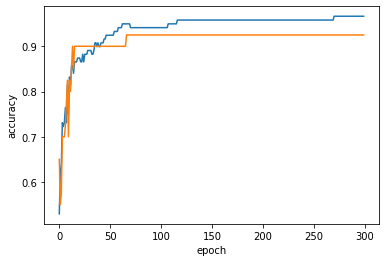

In [278]:
# 그래프
plt.plot(x)
plt.plot(y)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [279]:
# 최적의 학습 횟수 찾기(학습회수 바꾸어 가면서)
x_a=[]
y_a=[]
for i in range(1,501):
    sc=SGDClassifier(loss='log_loss',max_iter=i,random_state=42)
    sc.fit(train_scaled,train_target)
    x_a.append(sc.score(train_scaled,train_target))
    y_a.append(sc.score(test_scaled,test_target))

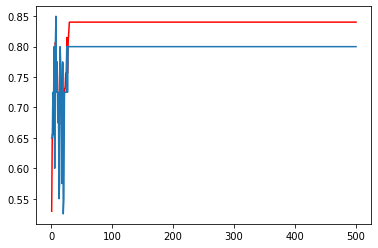

In [280]:
# 그래프
plt.plot(range(1,501),x_a,color='red')
plt.plot(range(1,501),y_a)

- 어느 순간 부터 같은 정확도만 나오므로 학습 횟수를 줄여보자!!

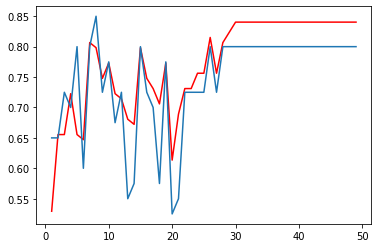

In [281]:
# 최적의 학습 횟수 찾기(학습회수 바꾸어 가면서)
x_a=[]
y_a=[]
for i in range(1,50):
    sc=SGDClassifier(loss='log_loss',max_iter=i,random_state=42)
    sc.fit(train_scaled,train_target)
    x_a.append(sc.score(train_scaled,train_target))
    y_a.append(sc.score(test_scaled,test_target))

# 그래프
plt.plot(range(1,50),x_a,color='red')
plt.plot(range(1,50),y_a)
plt.show()

In [282]:
# 최적의 학습 횟수 찾기
sc=SGDClassifier(loss='log_loss',random_state=42)

n=0
while(True):
    n+=1
    sc.partial_fit(train_scaled,train_target,classes=classes)
    if (sc.score(train_scaled,train_target)>=0.96) & (sc.score(test_scaled,test_target)>=0.925):
        print(f"최적의 학습회수는 {n}")
        break

최적의 학습회수는 271


In [283]:
# 버전확인
import pandas
print(f"pandas의 버전은 {pandas.__version__}입니다.")


import sklearn
print(f"sklearn의 버전은 {sklearn.__version__}입니다.")

pandas의 버전은 1.4.3입니다.
sklearn의 버전은 1.1.2입니다.


In [284]:
classes=sc.classes_
print(f"classes : {classes}")

classes : ['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [291]:
# 최적의 epoch 수로 학습 진행
sc=SGDClassifier(loss='log_loss',max_iter=2000,tol=None,random_state=42)
sc.fit(train_scaled,train_target)

print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))
print(sc.n_iter_)

0.957983193277311
0.925
2000


In [292]:
# early_stopping : 조기종료 여부(기: False)
# n_iter_no_change : n번 동안 변경 되지 않은 경우 early_stopping이 True
# tol : 성능 개선의 기준값
sc=SGDClassifier(loss='log_loss',
tol=1,
random_state=42,
n_iter_no_change=10,
early_stopping=True)
sc.fit(train_scaled,train_target)

print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))
print(sc.n_iter_)

0.8319327731092437
0.875
11
